In [2]:
#Import Modules
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def predict_cool_vs_warm(image):
    # Load the image and convert to HSV
    
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the hue channel (0 index)
    hue = image_hsv[:, :, 0]
    
    # Define warm (0-60) and cool (90-180) ranges
    warm_mask = (hue >= 100) & (hue <= 130)
    cool_mask = (hue >= 0) & (hue <= 50)
    
    # Calculate the percentage of warm and cool pixels
    warm_percentage = np.sum(warm_mask) / hue.size * 100
    cool_percentage = np.sum(cool_mask) / hue.size * 100
    
    # Decide which is dominant
    if warm_percentage > cool_percentage:
        prediction = "Warm"
    else:
        prediction = "Cool"
    
    print(f"Warm Pixels: {warm_percentage:.2f}%")
    print(f"Cool Pixels: {cool_percentage:.2f}%")
    
    return prediction




In [21]:

def predict_dull_vs_bright(image):
    # Load the image and convert to HSV
  
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the saturation and value (brightness) channels
    saturation = image_hsv[:, :, 1]
    value = image_hsv[:, :, 2]
    
    # Define thresholds for dull (low saturation and brightness)
    dull_saturation_threshold =80
    dull_value_threshold = 90
    
    # Calculate the percentage of dull pixels
    dull_mask = (saturation < dull_saturation_threshold) & (value < dull_value_threshold)
    dull_percentage = np.sum(dull_mask) / saturation.size * 100
    
    # Decide whether the image is dull or bright
    if dull_percentage > 10:  # If more than 50% of the image is dull
        prediction = "Dull"
    else:
        prediction = "Bright"
    
    print(f"Dull Pixels: {dull_percentage:.2f}%")
    
    return prediction



In [ ]:

#cam_webcam = cv2.VideoCapture(0) # default webcam
cam_file = cv2.VideoCapture("./data/videoplayback.webm") # default webcam

while True:
    ret, frame = cam_file.read()

    # ret, frame = cam_file.read()

    if not ret:
        break
    
    cv2.imshow("Video_File", frame)
    # Simple hack
    # cv2.imwrite("./data/temp.jpg", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam_file.release()
cv2.destroyAllWindows()

In [ ]:
image = cv2.imread('./data/I.png')

(910, 1898, 3)

In [4]:
##Reading Image

img_1 = cv2.imread('./video/img1.png')
img_2 = cv2.imread('./video/img2.png')
img_3 = cv2.imread('./video/img3.png')
img_4 = cv2.imread('./video/img4.png')
img_5 = cv2.imread('./video/img5.png')


pic_1 = cv2.imread('./video2/1.png')
pic_2 = cv2.imread('./video2/2.png')
pic_3 = cv2.imread('./video2/3.png')
pic_4 = cv2.imread('./video2/4.png')
pic_5 = cv2.imread('./video2/5.png')
pic_6 = cv2.imread('./video2/6.png')


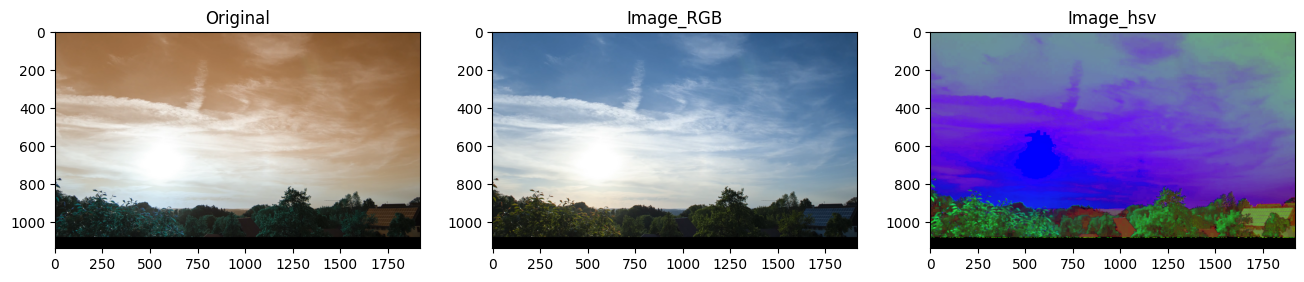

(1137, 1918, 3)

In [5]:
image = cv2.imread('./video2/1.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(16, 6))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(image_rgb)
plt.title("Image_RGB")

plt.subplot(1,3,3)
plt.imshow(image_hsv)
plt.title("Image_hsv")

plt.show()
image.shape

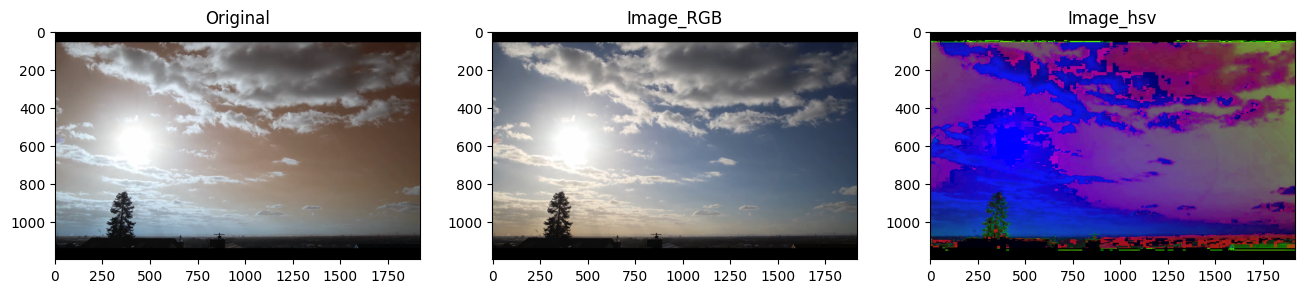

(1197, 1918, 3)

In [25]:
image = cv2.imread('./video/img1.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(image_rgb)
plt.title("Image_RGB")

plt.subplot(1,3,3)
plt.imshow(image_hsv)
plt.title("Image_hsv")

plt.show()
image.shape


(1137, 1908, 3)


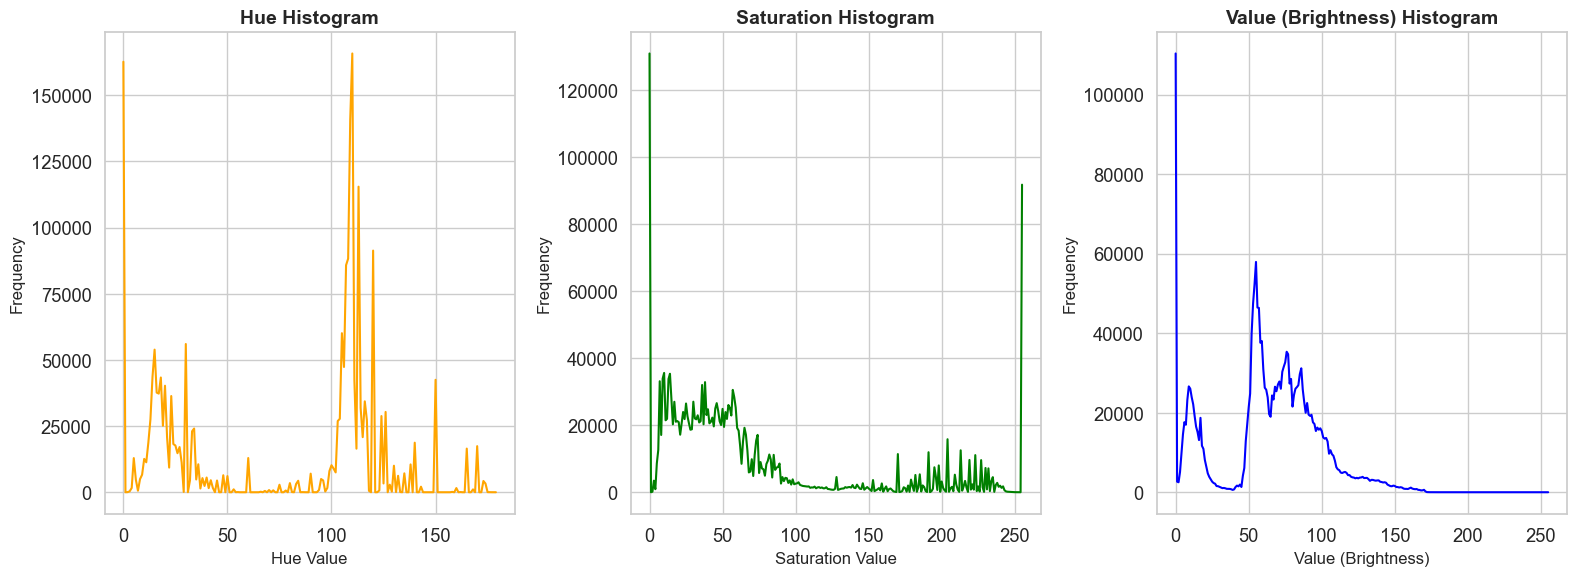

In [12]:
# Load the image and convert to HSV
image = cv2.imread('./video2/6.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

print(image_hsv.shape)

# Plot histograms for Hue, Saturation, and Value
hue_hist = cv2.calcHist([image_hsv], [0], None, [180], [0, 180])
saturation_hist = cv2.calcHist([image_hsv], [1], None, [256], [0, 256])
value_hist = cv2.calcHist([image_hsv], [2], None, [256], [0, 256])

#print(hue_hist)
#print(hue_hist[:, 0])

    
# Set Seaborn styling
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plotting
plt.figure(figsize=(16, 6))

# Plot the Hue histogram
plt.subplot(1, 3, 1)
sns.lineplot(x=np.arange(180), y=hue_hist[:, 0], color='orange')
plt.title('Hue Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Hue Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Plot the Saturation histogram
plt.subplot(1, 3, 2)
sns.lineplot(x=np.arange(256), y=saturation_hist[:, 0], color='green')
plt.title('Saturation Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Saturation Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Plot the Value histogram
plt.subplot(1, 3, 3)
sns.lineplot(x=np.arange(256), y=value_hist[:, 0], color='blue')
plt.title('Value (Brightness) Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Value (Brightness)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

In [22]:
predict_dull_vs_bright(pic_1)
predict_dull_vs_bright(pic_2)
predict_dull_vs_bright(pic_3)
predict_dull_vs_bright(pic_4)
predict_dull_vs_bright(pic_5)
predict_dull_vs_bright(pic_6)

Dull Pixels: 13.27%
Dull Pixels: 8.45%
Dull Pixels: 13.06%
Dull Pixels: 11.23%
Dull Pixels: 9.67%
Dull Pixels: 59.15%


'Dull'

In [1]:
def predict_dull_vs_bright(image,dull):
    # Load the image and convert to HSV
  
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Get the saturation and value (brightness) channels
    saturation = image_hsv[:, :, 1]
    value = image_hsv[:, :, 2]
    
    # Define thresholds for dull (low saturation and brightness)
    dull_saturation_threshold =80
    dull_value_threshold = 90

    
    # Calculate the percentage of dull pixels
    dull_mask = (saturation < dull_saturation_threshold) & (value < dull_value_threshold)
    dull_percentage = np.sum(dull_mask) / saturation.size * 100
    
    dull.append(dull_percentage)


In [20]:
video_path = "./video2/video2.mp4"

In [21]:
def calcu_day_nyt(video_path):
    cam_file = cv2.VideoCapture(video_path)

    dull = []
    
    while True:
       ret, frame = cam_file.read()

       if not ret:
           break
       
       resized_frame = cv2.resize(frame, (640, 360))
       cv2.imshow("Video_File", resized_frame)
       predict_dull_vs_bright(frame,dull)
   
       if cv2.waitKey(1) & 0xFF == ord('q'):
           break

    cam_file.release()
    cv2.destroyAllWindows() 
    
    mean_dull = round(np.mean(dull),2)
    print("In this Video {} % frame are Afternoon to Evening ".format(100 - mean_dull)) 
    print("In this Video {} % frame are Evening to Night".format(mean_dull)) 
    
    

In [22]:
calcu_day_nyt(video_path)

In this Video 89.19 % frame are Afternoon to Evening 
In this Video 10.81 % frame are Evening to Night
